In [1]:
import numpy as np
import pandas as pd
import os
import sqlalchemy as sqla
import sqlite3 as sql
from sqlite3 import Error
import re

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
file_loc = os.getcwd()

In [3]:
file_loc

'C:\\Users\\KH7020823\\sta208\\STA-208-project'

In [4]:
db1= sql.connect(file_loc+"\data1.db")
df1=pd.read_sql("SELECT * FROM loan",db1)
db2= sql.connect(file_loc+"\data2.db")
df2=pd.read_sql("SELECT * FROM loan",db2)
db3= sql.connect(file_loc+"\data3.db")
df3=pd.read_sql("SELECT * FROM loan",db3)
db4= sql.connect(file_loc+"\data4.db")
df4=pd.read_sql("SELECT * FROM loan",db4)
db5= sql.connect(file_loc+"\data5.db")
df5=pd.read_sql("SELECT * FROM loan",db5)
db6= sql.connect(file_loc+"\data6.db")
df6=pd.read_sql("SELECT * FROM loan",db6)
db7= sql.connect(file_loc+"\data7.db")
df7=pd.read_sql("SELECT * FROM loan",db7)
db8= sql.connect(file_loc+"\data8.db")
df8=pd.read_sql("SELECT * FROM loan",db8)
db9= sql.connect(file_loc+"\data9.db")
df9=pd.read_sql("SELECT * FROM loan",db9)
db10= sql.connect(file_loc+"\data10.db")
df10=pd.read_sql("SELECT * FROM loan",db10)
db11= sql.connect(file_loc+"\data11.db")
df11=pd.read_sql("SELECT * FROM loan",db11)
db12= sql.connect(file_loc+"\data12.db")
df12=pd.read_sql("SELECT * FROM loan",db12)

In [5]:
df = pd.DataFrame()
df = df.append(df1)
df = df.append(df2)
df = df.append(df3)
df = df.append(df4)
df = df.append(df5)
df = df.append(df6)
df = df.append(df7)
df = df.append(df8)
df = df.append(df9)
df = df.append(df10)
df = df.append(df11)
df = df.append(df12)
df.shape

(434407, 65)

In [6]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,...,num_sats,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,17600,17600,17600,36 months,10.75%,574.12,B,B4,RENT,57109,...,6,0,1,95.1,1,0,88629,83563,2300,80329
1,12500,12500,12500,60 months,8.39%,255.8,B,B1,RENT,120000,...,9,0,1,100,0,0,80899,40673,48400,32499
2,10000,10000,10000,36 months,11.99%,332.1,C,C1,MORTGAGE,75000,...,9,0,2,100,0,1,71858,48844,0,60358
3,3000,3000,3000,36 months,7.39%,93.17,A,A4,RENT,80000,...,6,0,0,95,0,0,221908,25665,42200,30936
4,2000,2000,2000,36 months,6.49%,61.29,A,A2,RENT,90000,...,19,0,2,97.3,0,0,176338,68841,122100,48438


Notice that the grade and subgrade variables are assessed directly from the interest rate, that is, the variable int_rate. Thus, mere int_rate suffices to cover the information provided by them, and grade and subgrade can be removed from our list of variables. Also zip_code is not appropriate to be deemed as a variable and issue_d doesn't contain valuable information, we also drop both of them.

#### Dummy variables

Among the 59 variables we have now, some of them are quantitative and have only a few statuses. For these variables, we can establish dummy variables that take either 0 or 1. For quantitative variables that have more than two categories, we combine some of to create more synthesized categories.

For the resonse variable loan_status, because it has 7 different categories, Fully paid, Current, In Grace Period, Late(16-30 days), Late(31-120 days), Default, Charged Off, we want to categorize them into two groups that result to a binary variable. Since the first two categories are signs of a good status of loan, and the latter five indicate different extents of late payment, we denote good status as Fully paid or Current, and bad status as In Grace Period, Late(16-30 days), Late(31-120 days), Default or Charged Off.

loan_status$=
\left\{\begin{array}{cl} 
		1,& \text{good status}\\
		0,& \text{bad status}
	\end{array}\right.$

And among the predictor varibles, purpose also has multiple categories: car, home-improvement, house, moving, major_purchase, renewable_enery, credit_card, debt_consolidation, small_business, medical, vacation and other, which requires many dummy variables. To make the situation simpler, except for medical, we classify car, home_improvement, house, moving, major_purchase and renewable_enery as property, credit_card, debt_consolidation and small_business as financial, vacation and other as others. Therefore, we get 4 categories of purposes, which can be represented by 3 dummy variables:

purpose1$=
\left\{\begin{array}{cl} 
		1,& \text{property}\\
		0,& \text{others} 
	\end{array}\right.$, 
purpose2$= 
\left\{\begin{array}{cl} 
		1,&\text{financial} \\
		0,&\text{others} 
	\end{array}\right.$, 
purpose3$=
\left\{\begin{array}{cl} 
		1,&\text{medical} \\
		0,&\text{others}  
	\end{array}\right.$

Also note that addr_state records the state address of the borrower. Considering the data is collected from Lending Club, which locates in San Francisco, CA, we want to know whether it makes a difference if the loan request is from an instate borrower or not. In this case, we only have to make a distinction between a California loaner and a non California borrower.

addr_state$=
\left\{\begin{array}{cl} 
		1,&\text{California} \\
		0,&\text{other states}  
	\end{array}\right.$

Similarly, in verification_status, we combine verified and source verified as verified:

verification_status$=
\left\{\begin{array}{cl} 
		1,& \text{verified}\\
		0, & \text{not verified}
	\end{array}\right.$
 
There are 4 more qualitative variables, which are coded as below:

term$=
\left\{\begin{array}{cl} 
		1,&\text{36 months} \\
		0,&\text{60 others}  
	\end{array}\right.$
 
home_ownership1$=
\left\{\begin{array}{cl} 
		1,& \text{rent}\\
		0,& \text{any}  
	\end{array}\right.$, 
home_ownership2$=
\left\{\begin{array}{cl} 
		1,& \text{own}\\
		0,& \text{any}
	\end{array}\right.$, 
home_ownership3$=
\left\{\begin{array}{cl} 
		1,& \text{mortage}\\
		0,& \text{any} 
	\end{array}\right.$

initial_list_status$=
\left\{\begin{array}{cl} 
		1,& \text{whole}\\
		0,& \text{fraction}
	\end{array}\right.$

application_type$=
\left\{\begin{array}{cl} 
		1,& \text{Individual}\\
		0,& \text{Joint App}
	\end{array}\right.$

In [7]:
data = df.copy()

col_drop = ['grade','sub_grade','issue_d','earliest_cr_line','grade','zip_code',
            'last_credit_pull_d', 'total_pymnt_inv','funded_amnt','funded_amnt_inv']
data = data.drop(col_drop, axis = 1)
data = data.reset_index(drop=True)

In [8]:
y_temp = data['loan_status']

In [9]:
# recode loan_status
y = y_temp.copy()
for i in range(len(y)):
    if (y_temp[i] == 'Fully Paid') or (y_temp[i] == 'Current'):
        y[i] = 'good'
    else:
        y[i] = 'bad'

In [10]:
y.head()

0    good
1    good
2    good
3    good
4    good
Name: loan_status, dtype: object

In [11]:
purpose_temp = data['purpose']

In [12]:
#recode purposes
purpose = purpose_temp.copy()
for i in range(len(purpose)):
    if (purpose_temp[i] == 'credit_card') or ( purpose_temp[i] == 'debt_consolidation') or (purpose_temp[i] == 'small_business'):
        purpose[i] = 'finantial'
    elif (purpose_temp[i] == 'vacation') or (purpose_temp[i] == 'other'):
        purpose[i] = 'others'
    elif purpose_temp[i] == 'medical':
        purpose[i] == 'medical'
    else:
        purpose[i] = 'property'

In [13]:
purpose.head()

0    finantial
1    finantial
2    finantial
3       others
4    finantial
Name: purpose, dtype: object

In [14]:
addr_state_temp = data['addr_state']

In [15]:
#recode addr_state
addr_state = addr_state_temp.copy()
for i in range(len(y)):
    if addr_state_temp[i] == 'CA':
        addr_state[i] = 'CA'
    else:
        addr_state[i] = 'other'

In [16]:
addr_state.head()

0    other
1    other
2    other
3    other
4    other
Name: addr_state, dtype: object

In [17]:
verification_status_temp = data['verification_status']

In [18]:
#recode addr_state
verification_status = verification_status_temp.copy()
for i in range(len(y)):
    if verification_status_temp[i] == 'Not Verified':
        verification_status[i] = 'not verified'
    else:
        verification_status[i] = 'verified'

In [19]:
verification_status.head()

0        verified
1    not verified
2    not verified
3    not verified
4    not verified
Name: verification_status, dtype: object

In [20]:
#Create dummy variables
dummy1 = pd.get_dummies(y)
dummy2 = pd.get_dummies(purpose)
dummy3 = pd.get_dummies(addr_state)
dummy4 = pd.get_dummies(data['term'])
dummy5 = pd.get_dummies(data['home_ownership'])
dummy6 = pd.get_dummies(verification_status)
dummy7 = pd.get_dummies(data['initial_list_status'])
dummy8 = pd.get_dummies(data['application_type'])

In [21]:
data_category = ['loan_status','verification_status','addr_state', 'term', 'initial_list_status',
                 'application_type','finantial','medical','property','MORTGAGE','OWN','RENT']

In [22]:
#Insert dummy variables into dataset
data['loan_status'] = dummy1['good']
data['addr_state'] = dummy3['CA']
data['term'] = dummy4[' 36 months']
data['verification_status'] = dummy6['verified']
data['initial_list_status'] = dummy7['w']
data['application_type'] = dummy8['Individual']

data = data.drop(['purpose','home_ownership'], axis = 1)
data = pd.concat([data, dummy2.iloc[:,[0,1,3]],dummy5.iloc[:,1:4]],axis = 1)

# convert all data as float
data['int_rate'] = [x[:-1] for x in data['int_rate']]
data = data.astype(float)
data['int_rate'] = data['int_rate']/100

data.head()

,loan_amnt,term,int_rate,installment,annual_inc,verification_status,loan_status,addr_state,delinq_2yrs,open_acc,...,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,finantial,medical,property,MORTGAGE,OWN,RENT
0,17600.0,1.0,0.1075,574.12,57109.0,1.0,1.0,0.0,0.0,6.0,...,88629.0,83563.0,2300.0,80329.0,1.0,0.0,0.0,0.0,0.0,1.0
1,12500.0,0.0,0.0839,255.80,120000.0,0.0,1.0,0.0,0.0,9.0,...,80899.0,40673.0,48400.0,32499.0,1.0,0.0,0.0,0.0,0.0,1.0
2,10000.0,1.0,0.1199,332.10,75000.0,0.0,1.0,0.0,0.0,9.0,...,71858.0,48844.0,0.0,60358.0,1.0,0.0,0.0,1.0,0.0,0.0
3,3000.0,1.0,0.0739,93.17,80000.0,0.0,1.0,0.0,1.0,6.0,...,221908.0,25665.0,42200.0,30936.0,0.0,0.0,0.0,0.0,0.0,1.0
4,2000.0,1.0,0.0649,61.29,90000.0,0.0,1.0,0.0,0.0,19.0,...,176338.0,68841.0,122100.0,48438.0,1.0,0.0,0.0,0.0,0.0,1.0


dummy1['good']

dummy2.iloc[:,[0,1,3]]

dummy3['CA']

dummy4[' 36 months']

dummy5.iloc[:,1:4]

dummy6['verified']

dummy7['w']

dummy8['Individual']

In [30]:
data_lasso = data.copy()

In [31]:
from  sklearn.preprocessing  import scale
data_lasso[data.columns[~data_lasso.columns.isin(data_category)]]=scale(data_lasso[data.columns[~data_lasso.columns.isin(data_category)]])

In [32]:
X = data_lasso[data_lasso.columns.difference(['loan_status'])].values
y = data_lasso.loc[:, 'loan_status'].values

In [33]:
X=X.astype(float)

Through setting the threshold - the coefficient is larger than $0.05$, we finally get the following $25$ X variables:

1) loan_amount: the list amount of the loan applied by the borrowers;

2)* term: The number of payments on the loan. 36months/60months;

3) int_rate: interest rate on the loan;

4) annual_inc: The self-reported annual income provided by the borrower during registration;

5) delinq_2yrs: The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years;

6) total_acc:  The total number of credit lines currently in the borrower's credit file;

7)* initial_list_status: The initial listing status of the loan. Possible values are – W, F;

8) out_prncp_inv: Remaining outstanding principal for portion of total amount funded by investors;

9) total_pymnt: Payments received to date for total amount funded;

10) total_rec_prncp: Principal received to date;

11) total_rec_int: Interest received to date;

12) total_rec_late_fee: Late fees received to date;

13) recoveries: post charge off gross recovery;

14) num_bc_sats: Number of satisfactory bankcard accounts;

15) num_bc_tl: Number of bankcard accounts;

16) num_op_rev_tl: Number of open revolving accounts;

17) num_rev_tl_bal_gt_0: Number of revolving trades with balance >0;

18) num_sats: Number of satisfactory accounts;

19) num_tl_op_past_12m: Number of accounts opened in past 12 months;

20) total_bc_limit: Total bankcard high credit/credit limit;

21)* finantial, medical, property: Purpose;

22)* MORTGAGE, RENT: home_ownership.

In [34]:
selected_X_0 = ['loan_amnt', 'term', 'int_rate', 'annual_inc', 'out_prncp',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'last_pymnt_amnt', 'num_bc_tl', 'num_op_rev_tl', 'num_rev_tl_bal_gt_0',
       'num_tl_op_past_12m', 'total_bc_limit', 'finantial', 'property',
       'MORTGAGE']

In [35]:
data_fnl = pd.concat([data_lasso[selected_X_0], data_lasso['loan_status']],axis = 1)

In [36]:
### training and test set split
#Split the data into training set(75% of data) and testing set(25% of data)
from sklearn.model_selection import train_test_split

train, test = train_test_split(data_fnl, test_size = 0.25, random_state = 0)

## get the train and test data set
X_tr = train[train.columns.difference(['loan_status'])].values
y_tr = train.loc[:, 'loan_status'].values

X_te = test[test.columns.difference(['loan_status'])].values
y_te = test.loc[:, 'loan_status'].values

### PCA

https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html

http://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html#sphx-glr-auto-examples-datasets-plot-iris-dataset-py


Since we have 62 predictor varaibles in total, dimension reduction of the design matrix is required in order to investigate into how different the borrowers are that results into their current loan status.

In [34]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA

In [35]:
pca = PCA()
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [36]:
print(pca.components_)

[[  4.13929757e-02  -2.22730688e-04  -4.11721513e-02 ...,   1.27766177e-01
    2.17455070e-01  -4.71501453e-03]
 [  5.75084541e-02  -6.01137543e-03  -5.14881632e-02 ...,   2.16542564e-01
    7.78261882e-02   4.03010797e-03]
 [  6.26512148e-02  -5.13189282e-03  -5.75465415e-02 ...,  -8.07356928e-02
   -2.84911776e-02  -6.73370933e-03]
 ..., 
 [ -5.77222944e-01  -5.77533162e-01  -5.77293999e-01 ...,   6.20046338e-05
    4.03988407e-05   2.28788328e-05]
 [ -3.23975238e-04  -3.16918038e-04  -3.49864701e-04 ...,  -3.22484567e-06
    1.29940330e-05  -1.43578917e-05]
 [ -4.44142244e-10  -1.50561669e-09  -7.63254680e-10 ...,   6.55767964e-01
   -8.14407527e-10  -2.49064144e-10]]


In [37]:
print(pca.explained_variance_)

[  9.81608413e+00   5.14510008e+00   3.30906292e+00   2.88422094e+00
   2.72092967e+00   2.33921190e+00   2.09417275e+00   1.79930456e+00
   1.39233096e+00   1.19027838e+00   1.17970868e+00   1.08317101e+00
   1.03463236e+00   9.82473151e-01   9.73164645e-01   9.53992859e-01
   8.82861841e-01   8.48981876e-01   8.14369183e-01   8.00570650e-01
   7.04152437e-01   6.82601906e-01   6.02410250e-01   5.59861184e-01
   4.82021733e-01   4.59159384e-01   4.38914804e-01   3.62848800e-01
   3.28550660e-01   2.69739364e-01   2.37887970e-01   2.20793108e-01
   2.14864436e-01   2.07547806e-01   2.03035497e-01   1.82409598e-01
   1.58820378e-01   1.57621314e-01   1.33244199e-01   1.13242831e-01
   1.05864302e-01   1.04460066e-01   7.87383836e-02   7.10033312e-02
   5.74312793e-02   4.89953398e-02   3.78087598e-02   3.55634673e-02
   2.02333992e-02   1.93966079e-02   1.72375628e-02   1.22584917e-02
   1.00650657e-02   6.38446061e-03   1.64925405e-03   1.00701473e-03
   8.43423279e-05   2.49288898e-06

If keeping the components that explain variances larger than 0.5, the first 24 components should be chosen as principal compnents.

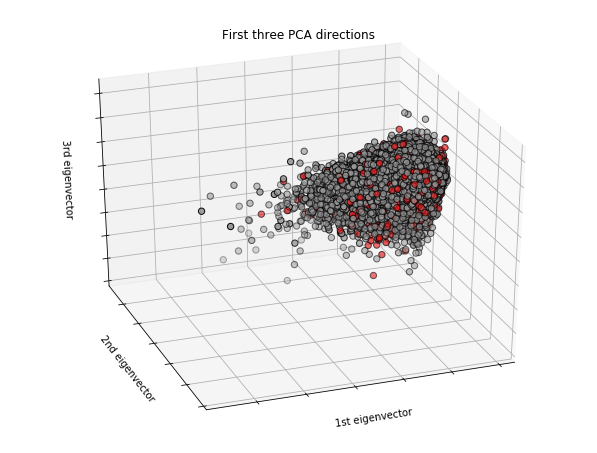

In [38]:
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(X,y)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

In [40]:
pc = pca.components_[:24]
pc = pd.DataFrame(pc)
pc.columns = data.drop(['loan_status'],axis = 1).columns.values

In [41]:
pc.head()

,loan_amnt,term,int_rate,installment,annual_inc,verification_status,addr_state,delinq_2yrs,open_acc,revol_bal,...,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,finantial,medical,property,MORTGAGE,OWN,RENT
0,0.041393,-0.000223,-0.041172,0.006078,0.139716,-0.000627,0.109445,-0.000486,0.056315,0.002510,...,0.230702,0.166745,0.206512,0.120172,0.146471,0.116288,0.009507,0.127766,0.217455,-0.004715
1,0.057508,-0.006011,-0.051488,0.005614,-0.181729,0.002842,0.151799,-0.004056,0.277776,-0.002107,...,-0.075890,0.136721,0.056838,0.110612,0.244053,0.192501,0.030682,0.216543,0.077826,0.004030
2,0.062651,-0.005132,-0.057547,0.031068,0.135233,-0.007176,0.075435,0.003125,0.221019,0.044761,...,0.201664,0.233746,-0.091244,0.275564,-0.133931,-0.242759,-0.010542,-0.080736,-0.028491,-0.006734
3,0.028586,0.006241,-0.034850,-0.012487,-0.188387,0.008204,0.027796,0.005421,0.112887,-0.043999,...,-0.092625,-0.079145,0.222063,-0.167085,-0.011096,-0.336333,-0.079128,0.093547,0.223750,-0.049851
4,0.021804,0.000552,-0.022428,0.024127,-0.153999,-0.005978,0.029583,0.000629,0.089828,0.020790,...,-0.007549,0.068146,0.068008,0.022860,-0.360003,0.028662,0.000200,-0.402689,0.098531,-0.026614


In [42]:
for i in range(len(pc)):
    pc1 = pc.iloc[i]
    print('component {}:\n {}\n'.format(i+1,pc1[abs(pc1)>=0.2]))

component 1:
 total_rev_hi_lim            0.218828
acc_open_past_24mths        0.227593
avg_cur_bal                 0.237175
chargeoff_within_12_mths    0.226499
mo_sin_old_rev_tl_op        0.249543
mo_sin_rcnt_rev_tl_op       0.234723
mo_sin_rcnt_tl              0.225950
mort_acc                    0.255642
num_actv_rev_tl             0.256476
tot_hi_cred_lim             0.230702
total_bc_limit              0.206512
OWN                         0.217455
Name: 0, dtype: float64

component 2:
 open_acc                0.277776
total_rec_prncp         0.250020
recoveries              0.268844
mo_sin_old_rev_tl_op   -0.212607
pub_rec_bankruptcies    0.230360
tax_liens               0.222157
finantial               0.244053
MORTGAGE                0.216543
Name: 1, dtype: float64

component 3:
 open_acc                      0.221019
recoveries                   -0.208166
delinq_amnt                   0.287357
num_bc_sats                  -0.229216
num_bc_tl                    -0.229209
pub_r

#### Varimax Rotation:

https://en.wikipedia.org/wiki/Talk:Varimax_rotation

In [43]:
from scipy import eye, asarray, dot, sum
from scipy.linalg import svd

In [44]:
def varimax(Phi, gamma = 1.0, q = 20, tol = 1e-6):
    #reference: https://en.wikipedia.org/wiki/Talk:Varimax_rotation
    p,k = Phi.shape
    R = eye(k)
    d=0
    for i in range(q):
        d_old = d
        Lambda = dot(Phi, R)
        u,s,vh = svd(dot(Phi.T,asarray(Lambda)**3 - (gamma/p) * dot(Lambda, np.diag(np.diag(dot(Lambda.T,Lambda))))))
        R = dot(u,vh)
        d = sum(s)
        if d_old!=0 and d/d_old < 1 + tol: break
    return dot(Phi, R)

In [45]:
pc_r = varimax(pca.components_)

In [46]:
pc_r = pd.DataFrame(pc_r)
pc_r.columns = data.drop(['loan_status'],axis = 1).columns.values

In [48]:
for i in range(24):
    pc1_r = pc_r.iloc[i]
    print('component {}:\n {}\n'.format(i+1,pc1_r[abs(pc1_r)>=0.2]))

component 1:
 num_sats    1.0
Name: 0, dtype: float64

component 2:
 tax_liens    1.0
Name: 1, dtype: float64

component 3:
 num_bc_sats   -1.0
Name: 2, dtype: float64

component 4:
 total_rec_int   -1.0
Name: 3, dtype: float64

component 5:
 MORTGAGE   -1.0
Name: 4, dtype: float64

component 6:
 num_accts_ever_120_pd    1.0
Name: 5, dtype: float64

component 7:
 num_rev_tl_bal_gt_0    1.0
Name: 6, dtype: float64

component 8:
 total_il_high_credit_limit   -1.0
Name: 7, dtype: float64

component 9:
 mo_sin_rcnt_rev_tl_op    1.0
Name: 8, dtype: float64

component 10:
 out_prncp    1.0
Name: 9, dtype: float64

component 11:
 acc_open_past_24mths   -1.0
Name: 10, dtype: float64

component 12:
 pct_tl_nvr_dlq    1.0
Name: 11, dtype: float64

component 13:
 num_tl_90g_dpd_24m    1.0
Name: 12, dtype: float64

component 14:
 property    1.0
Name: 13, dtype: float64

component 15:
 num_rev_accts    1.0
Name: 14, dtype: float64

component 16:
 revol_bal    1.0
Name: 15, dtype: float64

componen

### KNN Classification

In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics as skmetrics
import itertools

In [38]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Code from http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [39]:
#Function that calculate the test error
def test_error(X_tr,y_tr,X_te,y_te,regmod):
    """
    Return the test error for square error loss
    
    Input: training and testing design matrix, X_tr ,X_te
            training and testing response vector, y_tr, y_te
            a regression model, regmod
            
    Output: scalar empirical risk
    """
    regmod.fit(X_tr,y_tr)
    y_hat = regmod.predict(X_te)
    return np.mean((y_hat - y_te)**2)

In [ ]:
#Generate possible lambda's: integer points from 1 to 24
alphas = [i+1 for i in range(5,15)]

#Ridge regression
TestEr = []

neigh = KNeighborsClassifier()

for a in alphas:
    neigh.set_params(n_neighbors=a)
    TestEr.append(test_error(X_tr,y_tr,X_te,y_te,neigh))

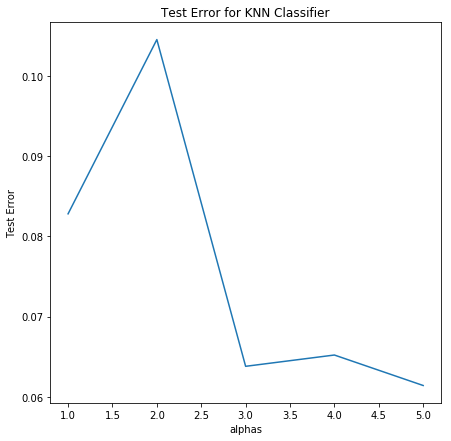

In [38]:
#Draw the Test Error for KNN classifier
fig = plt.figure(figsize = (7,7))
plt.plot(alphas,TestEr)

plt.xlabel('alphas')
plt.ylabel('Test Error')
plt.title('Test Error for KNN Classifier')
plt.show()

In [40]:
neigh = KNeighborsClassifier(n_neighbors = 5)
neigh.fit(X_tr, y_tr) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [34]:
pred_knn = neigh.predict(X_te)

Confusion matrix, without normalization
[[10038  4227]
 [ 7128 87209]]


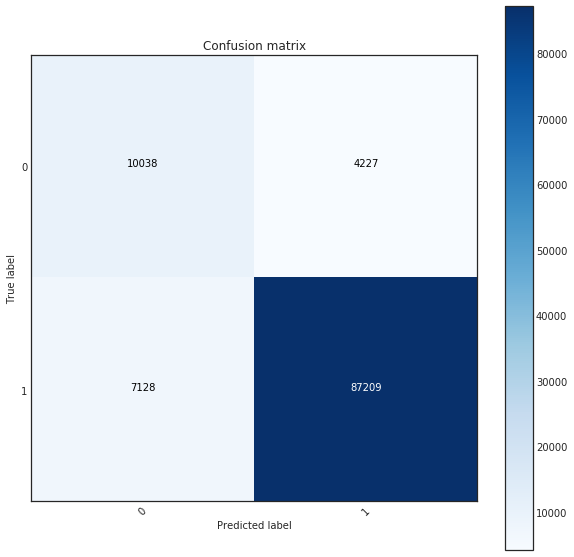

In [41]:
#Draw the confusion matrix
fig = plt.figure(figsize = (10,10))
with plt.style.context(('seaborn-white')):
    plot_confusion_matrix(confusion_matrix(y_te,pred_knn),[0,1])
plt.show()

### Random Forest Classifier

http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [42]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 1000, random_state = 0)
rf.fit(X_tr, y_tr)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [43]:
rf.feature_importances_

array([ 0.00229517,  0.00251183,  0.01840374,  0.00427328,  0.00334195,
        0.00241007,  0.02701729,  0.10805797,  0.00052665,  0.00942579,
        0.01140522,  0.01057769,  0.01069469,  0.0115923 ,  0.008898  ,
        0.1460369 ,  0.00154122,  0.20640548,  0.00881495,  0.0148542 ,
        0.01916585,  0.09350288,  0.05665624,  0.03078872,  0.19080192])

In [44]:
pred_rf = rf.predict(X_te)

In [45]:
#ROC curve
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr, tpr, _ = roc_curve(y_te, pred_rf)
roc_auc = auc(fpr, tpr)

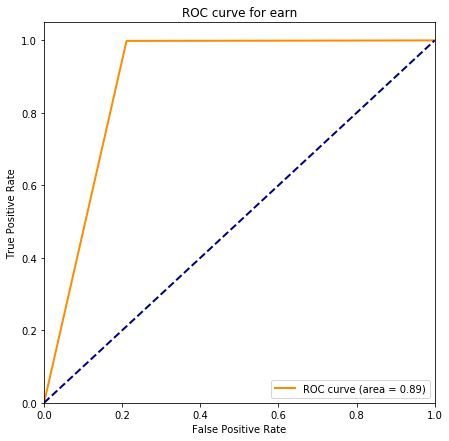

In [46]:
#Plot ROC curve
plt.figure(figsize = (7,7))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for earn')
plt.legend(loc="lower right")
plt.show()

In [47]:
#PR curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

average_precision = average_precision_score(y_te, pred_rf)
precision, recall, _ = precision_recall_curve(y_te, pred_rf)

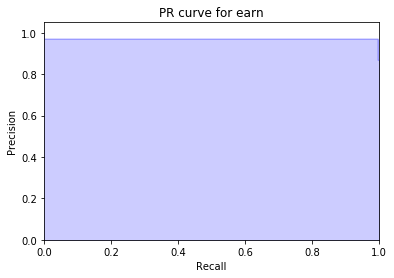

In [48]:
#Plot the Precision-Recall curve
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('PR curve for earn'.format(average_precision))
plt.show()

Confusion matrix, without normalization
[[11254  3011]
 [  136 94201]]


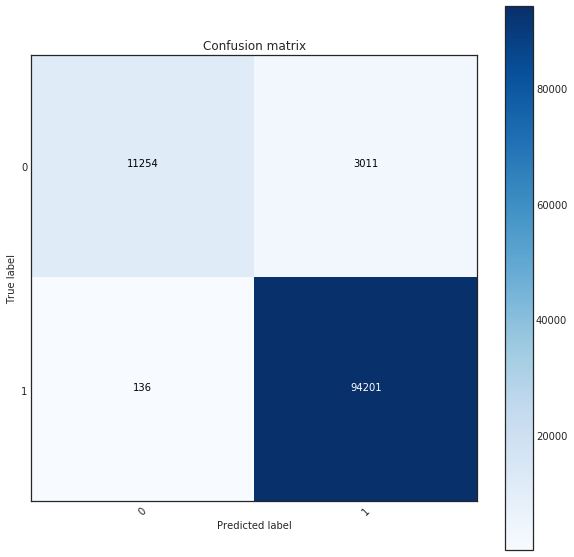

In [53]:
#Draw the confusion matrix
fig = plt.figure(figsize = (10,10))
with plt.style.context(('seaborn-white')):
    plot_confusion_matrix(confusion_matrix(y_te,pred_rf),[0,1])
plt.show()

In [52]:
#Accruate rate
sum(pred == y_te)/len(pred)

0.9710226331006796